######The latest version of this IPython notebook is available at [https://github.com/jckantor/Airbag-Design-for-Cargo-Airdrop](https://github.com/jckantor/Airbag-Design-for-Cargo-Airdrop) under the [MIT License](https://github.com/jckantor/Airbag-Design-for-Cargo-Airdrop/blob/master/LICENSE).

J.C. Kantor (Kantor.1@nd.edu)

# Vent Flowrate

In [2]:
#Initializations
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import math
pi = math.pi

from pint import UnitRegistry
ur = UnitRegistry()

## Mass Flow from an Orifice

The mass flow through the airbag vent orifice is given by

$$\dot{m} = C_DA_o \rho_o v_o$$

where the subscript $o$ refers to conditions at the orifice. We begin by constructing an estimate for $\rho_o v_o$ using Bernoulli's equation for compressible flow on a streamline, the pressure-density relationship for the isentropic expansion of an ideal gas, and an assumption regarding pressure at the orifice.

#### Bernoulli's Equation

Bernoulli's equation for the behavior of a compressible fluid along a streamline

$$\frac{v_o^2}{2} + \frac{\gamma}{\gamma-1} \frac{P_o}{\rho_o}  = \frac{\gamma}{\gamma-1} \frac{P}{\rho}$$

which, for a streamline starting deep within the airbag, gives for $v_o$ 

$$v_o = \sqrt{\frac{2\gamma}{\gamma -1}\left(\frac{P}{\rho} - \frac{P_o}{\rho_o}\right)}$$

then for $\rho_ov_o$

$$\rho_ov_o = \sqrt{\frac{2\gamma\rho_o^2}{\gamma -1}\left(\frac{P}{\rho} - \frac{P_o}{\rho_o}\right)}$$

#### Adiabatic Expansion

For the adiabatic expansion of an ideal gas,

$$\frac{\rho_o}{\rho} = \left(\frac{P_o}{P}\right)^{\frac{1}{\gamma}}$$

Substituting into the expression for $\rho_ov_o$,

$$\rho_ov_o = \sqrt{\frac{2\gamma\rho^2}{\gamma -1}\left(\frac{P_o}{P}\right)^\frac{2}{\gamma}\left(\frac{P}{\rho} - \frac{P_o}{\rho\left(\frac{P_o}{P}\right)^\frac{1}{\gamma}}\right)}$$

After some rearrangement

$$\rho_ov_o = \sqrt{\frac{2\gamma\rho P}{\gamma -1}\left[\left(\frac{P_o}{P}\right)^\frac{2}{\gamma} - \left(\frac{P_o}{P}\right)^{1+\frac{1}{\gamma}}\right]}$$

#### Evaluating Pressure at the Orifice

Assuming the pressure at the orifice is equal to the surrounding ambient pressure, $P_o = P_a$.  With that assumption we have

$$\dot{m} = C_D A_o \sqrt{\frac{2\gamma\rho P}{\gamma -1}\left[\left(\frac{P_a}{P}\right)^\frac{2}{\gamma} - \left(\frac{P_a}{P}\right)^{1+\frac{1}{\gamma}}\right]}$$

This expression is 

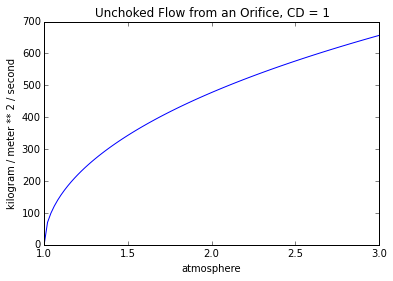

In [132]:
from pint import UnitRegistry
ur = UnitRegistry()

# ideal gas parameters for air
gamma = 1.4
R = 8.314 * ur.J/(ur.degK*ur.mol)
MW = 28.966 * ur.grams/ur.mol

# ambient conditions
Pa = 1.0 * ur.atm
Ta = ur.Quantity(20,ur.degC).to(ur.degK)

def Qflow(P,Pa):
    Pr = Pa/P
    rho = MW*P/(R*Ta)
    b = 2.0*(gamma/(gamma-1))*rho*P
    Q = np.sqrt(b*(Pr**(2.0/gamma)-Pr**((1.0+1.0/gamma))))
    return Q.to(ur.kg/ur.m**2/ur.sec)

P = np.linspace(1.0,3.0,100) * ur.atm
Q = [Qflow(p,Pa) for p in P]

plt.plot(P,[q.magnitude for q in Q])
plt.title('Unchoked Flow from an Orifice, CD = 1')
plt.ylabel(Q[0].units)
plt.xlabel(P.units)

## Choked Flow

When the flow is choked, flow through the orific depends only on the upstream pressure $P$

$$\dot{m} = C_d A \sqrt{\gamma \rho P \left(\frac{2}{\gamma + 1}\right)^\left(\frac{\gamma + 1}{\gamma - 1}\right)}$$

| Parameter | Description | Units |
| :-------: | :-: | :-: |
| $\dot{m}$ | mass flow rate | kg/s |
| $C_d$ | discharge coefficient | dimensionless|
| $A$ | area of discharge | m**2 |
| $\gamma$ | ratio of heat capacities $\frac{C_p}{C_v}$ | dimensionless |
| $\rho$ | gas density | kg/m**3 |
| $P$ | pressure | Pa |
| $T$ | temperature | K |


### Critical Pressure Ratio

The critical pressure ratio is the ratio of upstream to downstream pressure of a compressible gas at which leads to choked flow.  Given the ratio of heat capacities

$$\gamma = \frac{C_p}{C_v}$$

the critical ratio is

$$\left(\frac{P_2}{P_1}\right)_{critical} =  \left(\frac{\gamma+1}{2}\right)^\left({\frac{\gamma}{\gamma-1}}\right)$$

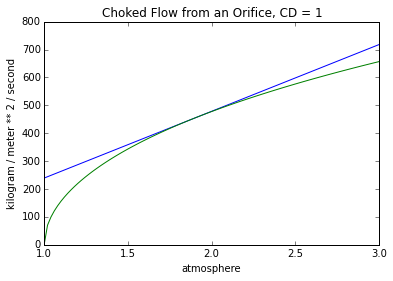

In [133]:
from pint import UnitRegistry
ur = UnitRegistry()

# ideal gas parameters for air
gamma = 1.4
R = 8.314 * ur.J/(ur.degK*ur.mol)
MW = 28.966 * ur.grams/ur.mol

# ambient conditions
Pa = 1.0 * ur.atm
Ta = ur.Quantity(20,ur.degC).to(ur.degK)

def Qchoke(P):
    Pr = Pa/P
    rho = MW*P/(R*Ta)
    a = gamma*P*rho
    Q = np.sqrt(a*(2.0/(gamma+1))**((gamma+1)/(gamma-1)))
    return Q.to(ur.kg/ur.m**2/ur.sec)

P = np.linspace(1.0,3.0,100) * ur.atm
Qc = [Qchoke(p) for p in P]

plt.plot(P,[q.magnitude for q in Qc],P,[q.magnitude for q in Q])
plt.title('Choked Flow from an Orifice, CD = 1')
plt.ylabel(Qc[0].units)
plt.xlabel(P.units)

In [1]:
gamma = dict()

gamma['air (dry)'] = 1.4
gamma['argon'] = 1.67
gamma['butane'] = 1.096
gamma['carbon dioxide'] = 1.30
gamma['chlorine'] = 1.33
gamma['helium'] = 1.660
gamma['hydrogen'] = 1.41
gamma['nitrogen'] = 1.404
gamma['oxygen'] = 1.400
gamma['propane'] = 1.15

print "{0:<15s}   {1:6s}  {2:6s}".format("Species","CR", "1/CR")

for s in sorted(gamma.keys()):
    r = ((gamma[s]+1)/2)**(gamma[s]/(gamma[s]-1))
    print "{0:<15s}   {1:6.4f}  {2:6.4f}".format(s, r, 1.0/r)


def isChoked(Phi, Plo = 101325.0, gamma = 1.4):
    r = ((gamma+1)/2)**(gamma/(gamma-1))
    return Phi > r*Plo

print isChoked(250000.0)
print isChoked(150000.0)

Species           CR      1/CR  
air (dry)         1.8929  0.5283
argon             2.0548  0.4867
butane            1.7079  0.5855
carbon dioxide    1.8324  0.5457
chlorine          1.8506  0.5404
helium            2.0488  0.4881
hydrogen          1.8990  0.5266
nitrogen          1.8953  0.5276
oxygen            1.8929  0.5283
propane           1.7410  0.5744
True
False


## Coefficient of Discharge

Based on Browning (1963)

$$C_D = 0.9 - 0.3\frac{P_a}{P}$$